# **Task:** Applying CNN on the CIFAR-10 Dataset

## **Date:** 31|11|22

# **Data**
CIFAR-10 is a dataset of 50,000 32x32 color raining images, labeled over 10 categories and 10,000 test images.The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

Here are the classes in the dataset, as well as 10 random images from each:
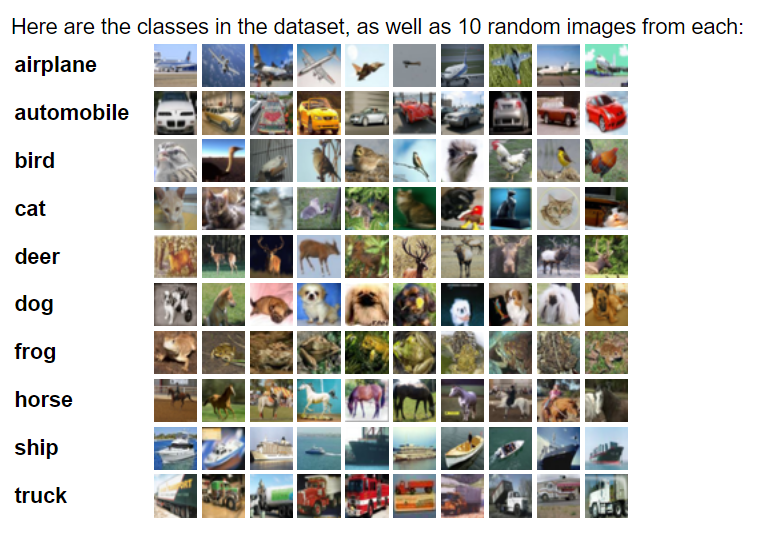


# **Step 1: Importing the required Libraries.**

In [1]:
import pandas as pd              # Used for working with Dataframes and Series
import numpy as np               # advanced math library
import tensorflow as tf          # Open source library for Machine learning and artificial Intelligence
import ssl                       # This module provides access to Transport Layer Security (often known as “Secure Sockets Layer”) encryption 
                                 # and peer authentication facilities for network sockets, both client-side and server-side. This module uses the OpenSSL library
ssl._create_default_https_context = ssl._create_unverified_context
import matplotlib.pyplot as plt  # helps in plotting 
from tensorflow.keras.utils import to_categorical # For converting the categorical variable 
                                                  # based on one hot encoding
from tensorflow.keras.models import Sequential    # Model type to be used
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten  #Methods to extract information from the image
from keras.layers.normalization.batch_normalization import BatchNormalization # For Batch normalization method
from keras.layers.core import Dense, Dropout, Activation  # Types of layers to be used in the model
from tensorflow.keras import regularizers

# **Step 2: Importing the dataset and dividing the data into test and train**

In [2]:
from tensorflow.keras.datasets import cifar10
(x_train,y_train), (x_test, y_test) = cifar10.load_data()

Checking the shape of the dataset. There are 50,000 images in the training Set with pixels 32 x 32. Since the images are coloured, there are three layers to it.

In [3]:
x_train.shape 

(50000, 32, 32, 3)

In [4]:
x_train[0].shape

(32, 32, 3)

By printing the one of the images from the training set, we can have a better idea about the data.

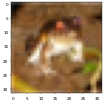

In [5]:
# FROG
plt.figure(figsize = (6,4),dpi = 30 ) # Here dots per inch(DPI) indicate the number of 
                                      # dots that can be placed in a 1 inch line.
plt.imshow(x_train[0])

For the second image.

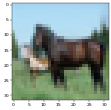

In [6]:
#Horse
plt.figure(figsize = (6,4),dpi = 32 )
plt.imshow(x_train[12])

**Step 3: PreProcessing**

For the first image Layer 1

In [7]:
x_train[0][0] #Checking the first image's layer 1

array([[ 59,  62,  63],
       [ 43,  46,  45],
       [ 50,  48,  43],
       [ 68,  54,  42],
       [ 98,  73,  52],
       [119,  91,  63],
       [139, 107,  75],
       [145, 110,  80],
       [149, 117,  89],
       [149, 120,  93],
       [131, 103,  77],
       [125,  99,  76],
       [142, 115,  91],
       [144, 112,  86],
       [137, 105,  79],
       [129,  97,  71],
       [137, 106,  79],
       [134, 106,  76],
       [124,  97,  64],
       [139, 113,  78],
       [139, 112,  75],
       [133, 105,  69],
       [136, 105,  74],
       [139, 108,  77],
       [152, 120,  89],
       [163, 131, 100],
       [168, 136, 108],
       [159, 129, 102],
       [158, 130, 104],
       [158, 132, 108],
       [152, 125, 102],
       [148, 124, 103]], dtype=uint8)

In [8]:
x_train[0].shape

(32, 32, 3)

# Performing the normalization.

In [9]:
x_train.max()

255

In [10]:
x_train = x_train/255

In [11]:
x_test = x_test/255

In [12]:
x_train.shape

(50000, 32, 32, 3)

In [13]:
x_test.shape

(10000, 32, 32, 3)

# **Step 4: Label**
We will be encoding the dependent variable using One hot encoding.

In [14]:
# Checking for the shape of y_train
y_train.shape

(50000, 1)

Using pandas dataframe checking the unique values in the dependent class.

In [15]:
y__train = pd.DataFrame(y_train)
y__train[0].unique()

array([6, 9, 4, 1, 2, 7, 8, 3, 5, 0], dtype=uint8)

Encoding the dependent variable.

In [16]:
y_cat_train = to_categorical(y_train, 10)

In [17]:
y_cat_train.shape

(50000, 10)

In [18]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [19]:
y_cat_test = to_categorical(y_test, 10)

After encoding the dependent variable is now a 2-D array

In [20]:
y_cat_test.shape

(10000, 10)

In [21]:
y_cat_test[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

# **Step 5: Building the Model**

A. Creating a Sequential Object which is used to simply arranging the Keras layers in a sequential order and so, it is called Sequential API. Most of the ANN also has layers in sequential order and the data flows from one layer to another layer in the given order until the data finally reaches the output layer.





In [22]:
model = Sequential()

B. Creating the first Covolution layer, 

Kernal size has been chosen as 3 x 3 as it was found that the accuracy is better with a lower order kernal. As we increase the order of the matrix,the model performance was found to be deteriorating. 

The number of filters is taken to be 32, because it was observed as the number of filter is increased model was Overfitting.

input_shape being the image with 32 x 32 x 3 dimensions.

In [23]:
# FIRST SET OF LAYERS

# CONVOLUTION LAYER
model.add(Conv2D(filters = 32, kernel_size = (3,3),
                 input_shape = (32,32,3)))

C. Activation function used is ReLU: It converts all negative inputs to the node in the next layer to be zero. These inputs are then not considered to be fired. The positive values are unchanged.  

In [24]:
model.add(Activation('relu')) 

C. Applying Max Pooling so as to extract further the most important features and thereby reducing the order of matix further.

In [25]:
# POOLING LAYER
model.add(MaxPool2D(pool_size = (2,2)))

D. Adding the **second Covolution layer** and applying Max Pooling. Here we are increasing the no. of filters so as to extract more information.

In [26]:
## SECOND SET OF LAYERS
# CONVOLUTION LAYER
model.add(Conv2D(filters = 64, kernel_size = (3,3)))

In [27]:
model.add(Activation('relu')) 

In [28]:
#Pooling layer
model.add(MaxPool2D(pool_size = (2,2)))

E. Adding a **third layer** in the sequence. Here too we are further increasing the number of filters. Moreover, Dropout is also used so that some randomly chosen seventy percent of the neurons only can pass the inputs for the next layer.

In [29]:
## Third SET OF LAYERS
model.add(Conv2D(128, kernel_size=(3, 3), input_shape=x_train.shape[1:], activation ="relu"))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

E. Finally **flattening** the matrix and inputing the values to the next layer.

In [30]:
# Flatten  images from 28 by 28  to 764 BEFORE FINAL LAYER
model.add(Flatten())

F. Creating a **dense layer with 256 Neurons**, and applying the activation function 'relu'. Further a **L2 regularization** is applied since it was found that in the absence of the regularization, model was overfitting. Here, the learning rate was selected to be 0.01 as this provided the best accuracy. Also, drop out of 0.15 was also applied to the layer. This, gave a better accuracy.

In [31]:
# 256 Neurons in dense hidden layer ()
model.add(Dense(256,activation = 'relu',kernel_regularizer =tf.keras.regularizers.l2( l=0.01)))

In [32]:
model.add(Dropout(0.15)) 

G. Adding another layer, which is the **last layer**. Thus, we apply **softmax** activation function. The number of neurons is 10, cause we have 10 categories to predict. THe output values will be in probabilities which will add upto 1.

In [33]:
# last layer is the classifier, THUS 10 possible classes
model.add(Dense(10, activation = 'softmax'))

H. **Compiling the model**, with the loss function being 'Categorical crossentropy' the reason being we encoding the dependent variable using One hot encoding. 

The optimizer used is 'rmsprop' or Root Mean Square Propogation  and metric being 'accuracy'.

In [34]:
model.compile(loss = 'categorical_crossentropy', 
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

H. Since no batch normalization has been performed. There are zero non-trainable parameters.

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 activation (Activation)     (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 13, 13, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                    

I. We use **Early stopping** which is a feature that enables the training to be automatically stopped when a chosen metric has stopped improving. It has two parameters which are:
1. **Patience**: This is the number of Epochs without improvement after which training will be early stopped.

2. **Metrics** - It is the barometer which is used to stop the number of iterations.

In [36]:
from tensorflow.keras.callbacks import EarlyStopping

By setting the patience to 5. I am unable to find the reason, by letting the model to train more, there was an improvement in the model.

In [37]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5)

J. Finally fitting the model.

In [38]:
model.fit(x_train, y_cat_train, epochs = 30, 
          validation_data = (x_test,y_cat_test), 
          callbacks = [early_stop])

Epoch 1/30
1563/1563 [==============================] - 13s 7ms/step - loss: 1.8004 - accuracy: 0.3895 - val_loss: 1.4962 - val_accuracy: 0.5003
Epoch 2/30
1563/1563 [==============================] - 14s 9ms/step - loss: 1.4253 - accuracy: 0.5257 - val_loss: 1.2441 - val_accuracy: 0.6021
Epoch 3/30
1563/1563 [==============================] - 10s 6ms/step - loss: 1.2988 - accuracy: 0.5797 - val_loss: 1.2006 - val_accuracy: 0.6100
Epoch 4/30
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2073 - accuracy: 0.6169 - val_loss: 1.1516 - val_accuracy: 0.6357
Epoch 5/30
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1471 - accuracy: 0.6382 - val_loss: 1.2739 - val_accuracy: 0.6035
Epoch 6/30
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0993 - accuracy: 0.6591 - val_loss: 1.0992 - val_accuracy: 0.6586
Epoch 7/30
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0610 - accuracy: 0.6715 - val_loss: 1.0329 - val_accura

In [39]:
#Saving the model performance. It is saved in the working directory in the format .h5.
model.save('cifar_30epochs.h5')

In [40]:
# Creating a datframe which contain all metrics
losses = pd.DataFrame(model.history.history)

In [41]:
losses.head() # First five records

,loss,accuracy,val_loss,val_accuracy
0,1.800373,0.38948,1.496248,0.5003
1,1.425253,0.52566,1.244084,0.6021
2,1.298798,0.57966,1.200574,0.6100
3,1.207337,0.61694,1.151563,0.6357
4,1.147102,0.63824,1.273884,0.6035


# **Step 6: Checking the model performance**

A. We plot the  validation accuracy and the train accuracy to check for overfitting.

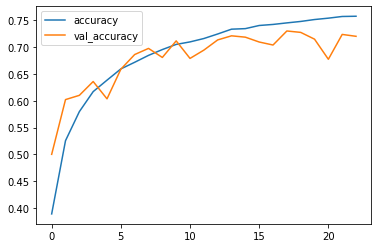

In [42]:
losses[['accuracy','val_accuracy']].plot();

B. Similarly plotting validation loss value and train loss value, to check for overfitting.

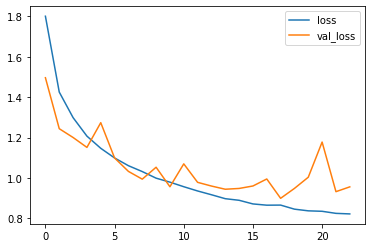

In [43]:
losses[['loss','val_loss']].plot();

In [44]:
model.metrics_names

['loss', 'accuracy']

C. Predicting the test data based on the CNN model.

In [45]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose = 0))

['loss', 'accuracy']
[0.956356942653656, 0.7197999954223633]


D. To check for the model performance based on various metric we can use the confusion matrix and the classification report.

In [46]:
from sklearn.metrics import classification_report,confusion_matrix
predict_x = model.predict(x_test)
predict_classes = np.argmax(predict_x,axis=1)

313/313 [==============================] - 1s 2ms/step


In [47]:
print(classification_report(y_test,predict_classes)) # Classification Report

              precision    recall  f1-score   support

           0       0.71      0.76      0.73      1000
           1       0.90      0.84      0.87      1000
           2       0.54      0.74      0.63      1000
           3       0.46      0.73      0.57      1000
           4       0.75      0.65      0.69      1000
           5       0.69      0.60      0.64      1000
           6       0.86      0.73      0.79      1000
           7       0.81      0.73      0.76      1000
           8       0.93      0.70      0.80      1000
           9       0.88      0.73      0.80      1000

    accuracy                           0.72     10000
   macro avg       0.75      0.72      0.73     10000
weighted avg       0.75      0.72      0.73     10000



In [48]:
confusion_matrix(y_test,predict_classes) # Confusion Matrix

array([[758,  11,  99,  53,  16,   7,   3,  13,  24,  16],
       [ 22, 839,  13,  31,   3,   3,  14,  13,  12,  50],
       [ 50,   1, 742,  76,  40,  46,  32,  10,   2,   1],
       [ 10,   1,  79, 733,  36,  99,  24,  14,   1,   3],
       [ 21,   0, 126, 101, 646,  24,  27,  52,   3,   0],
       [  2,   0,  85, 245,  33, 596,   6,  32,   0,   1],
       [  7,   1,  85, 131,  33,   7, 726,  10,   0,   0],
       [ 16,   0,  67,  81,  44,  62,   0, 727,   0,   3],
       [131,  20,  41,  59,  11,   3,   4,   4, 701,  26],
       [ 48,  59,  28,  67,   4,  16,  10,  26,  12, 730]])

E. Using a heatmap to observe the confusion matrix.

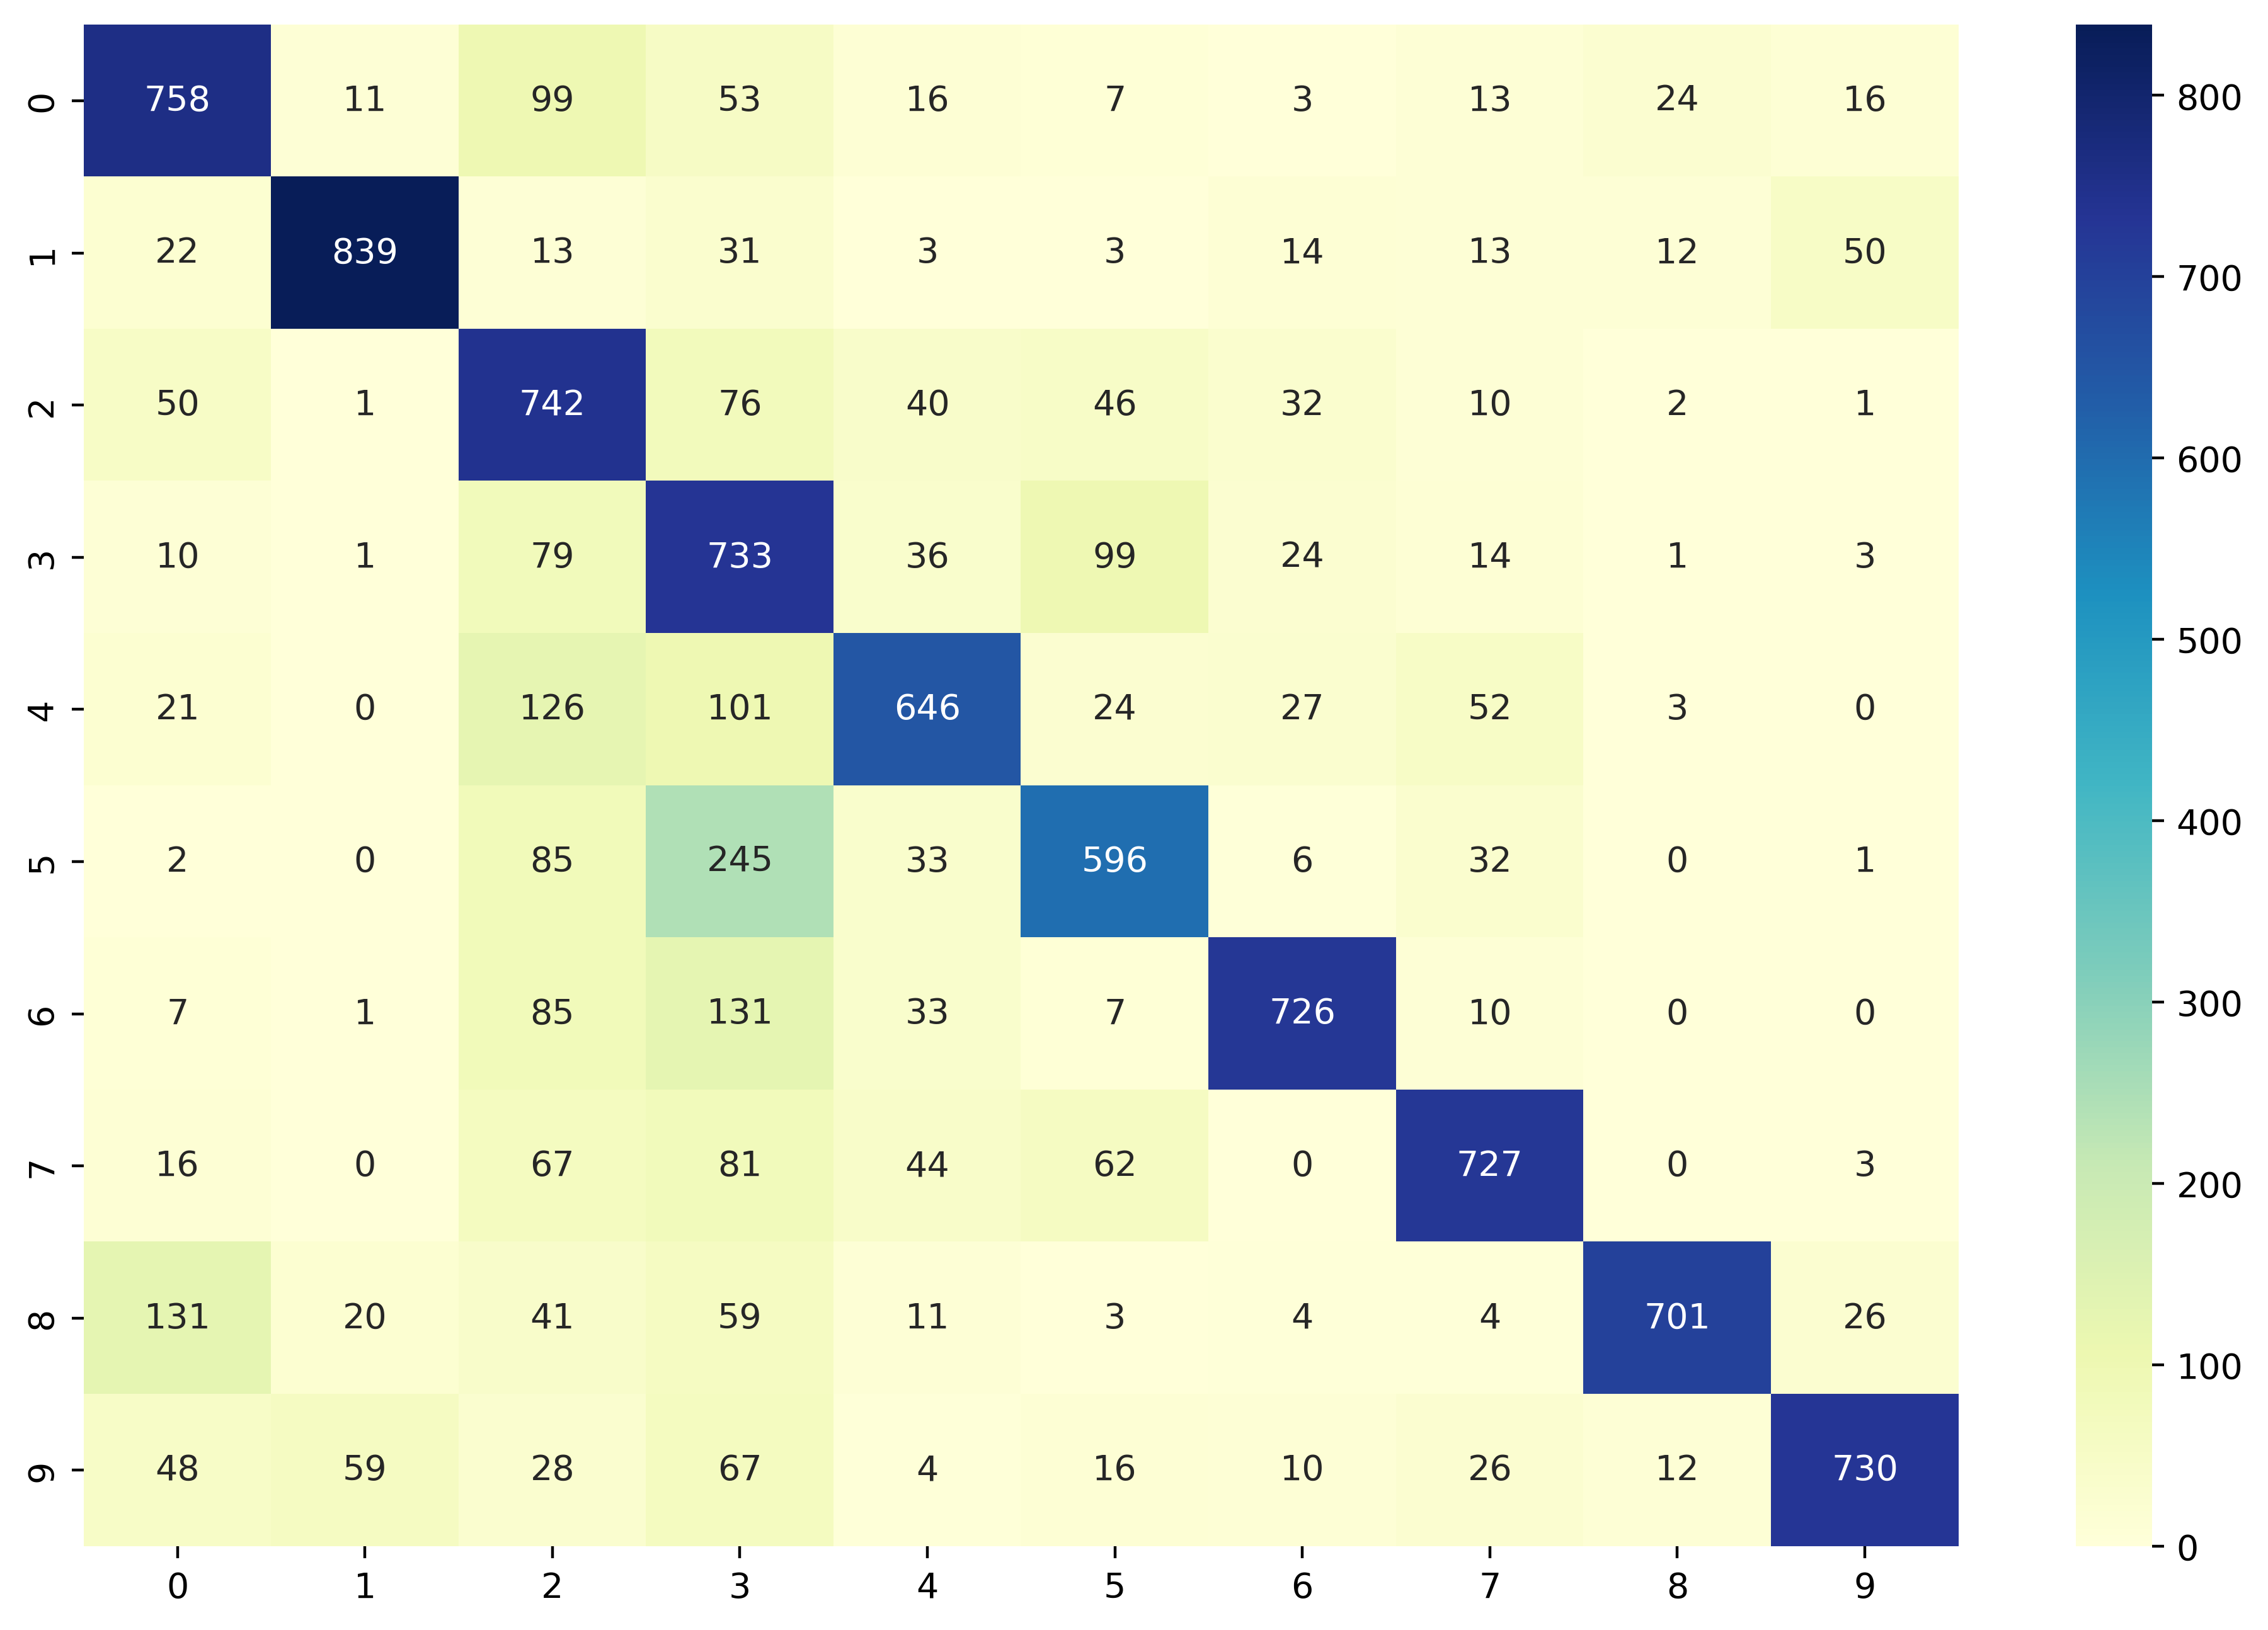

In [49]:
import seaborn as sns
plt.figure(figsize=(12,8), dpi = 400)
sns.heatmap(confusion_matrix(y_test,predict_classes),cmap="YlGnBu", annot=True, fmt='g');

Predicting a given image

In [50]:
my_image = x_test[10]

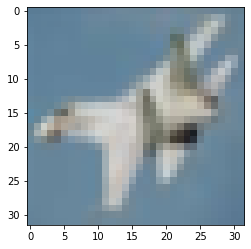

In [51]:
plt.imshow(my_image)

In [52]:
np.set_printoptions(formatter = {'float_kind': '{:f}'.format})
# SHAPE --> (num_images,width,height,color_channels)
model.predict(my_image.reshape(1,32,32,3))

1/1 [==============================] - 0s 71ms/step


array([[0.358179, 0.009378, 0.084772, 0.259524, 0.066941, 0.103951,
        0.006467, 0.039517, 0.052361, 0.018912]], dtype=float32)

**Result:** The image is correctly predicted as Class 0: Airplane.

In [53]:
my_image = x_test[17]

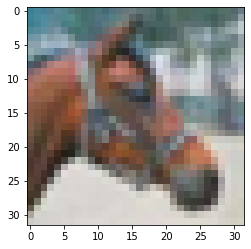

In [54]:
plt.imshow(my_image)

In [55]:
np.set_printoptions(formatter = {'float_kind': '{:f}'.format})
# SHAPE --> (num_images,width,height,color_channels)
model.predict(my_image.reshape(1,32,32,3))

1/1 [==============================] - 0s 19ms/step


array([[0.052606, 0.008297, 0.092827, 0.304328, 0.042849, 0.187060,
        0.029160, 0.248986, 0.009700, 0.024187]], dtype=float32)

**Result:** The image is wrongly predicted as of class 4 which is Cat.